## Imports

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

# Criterias and Funcs

## Base Criterias

In [ ]:
def calc_mre(true, pred):
  return (np.abs(true - pred)/np.abs(true)).mean()

In [ ]:
def calc_rmse(true, pred):
  return np.mean(np.sqrt((true-pred)**2))

In [ ]:
def calc_mse(true, pred):
  return np.mean((true-pred)**2)

## Ready2go Funcs

In [ ]:
def inv_mult(B, v1):
  return np.linalg.solve(B,v1)

In [ ]:
def plot_regression(X, y, y_pred, log=None, title="Regression Plot"):
    plt.figure(figsize=(16,6))
    plt.rcParams['figure.dpi'] = 227
    plt.scatter(X, y, label='Data', c='#388fd8', s=6)
    if log != None:
        for i in range(len(log)):
            plt.plot(X, log[i][0]*X + log[i][1], lw=1, c='#caa727', alpha=0.35)
    plt.plot(X, y_pred, c='#ff7702', lw=3, label='Regression')
    plt.title(title, fontSize=14)
    plt.xlabel('X', fontSize=11)
    plt.ylabel('Y', fontSize=11)
    plt.legend(frameon=True, loc=1, fontsize=10, borderpad=.6)
    plt.tick_params(direction='out', length=6, color='#a0a0a0', width=1, grid_alpha=.6)
    plt.show()

# Respostas

## Qo1) A - OLS

### dataset

In [ ]:
artificial = np.genfromtxt('/content/artificial1d.csv', delimiter=',')
artificial

array([[-1.        , -2.08201726],
       [-0.93103448, -1.32698023],
       [-0.86206897, -1.10559772],
       [-0.79310345, -0.87394576],
       [-0.72413793, -0.28502695],
       [-0.65517241, -0.43115252],
       [-0.5862069 , -0.79475402],
       [-0.51724138, -0.88606806],
       [-0.44827586, -0.89989978],
       [-0.37931034, -0.86184365],
       [-0.31034483, -0.88805183],
       [-0.24137931, -1.23595129],
       [-0.17241379, -0.71956827],
       [-0.10344828, -0.45202286],
       [-0.03448276,  0.09889951],
       [ 0.03448276,  0.34896973],
       [ 0.10344828,  0.09747797],
       [ 0.17241379,  0.70019809],
       [ 0.24137931,  1.31051213],
       [ 0.31034483,  1.00177576],
       [ 0.37931034,  1.00318231],
       [ 0.44827586,  1.14910129],
       [ 0.51724138,  1.59220607],
       [ 0.5862069 ,  0.60909009],
       [ 0.65517241,  0.59441623],
       [ 0.72413793,  0.70300732],
       [ 0.79310345,  0.82332241],
       [ 0.86206897,  1.10646439],
       [ 0.93103448,

In [ ]:
artificial.shape

(30, 2)

In [ ]:
X = np.hstack((np.ones((30, 1)), artificial[:, [0]]))
y = artificial[:, [1]]

In [ ]:
print('X shape: ', X[1].shape)
print('y shape: ', y.shape)

X shape:  (2,)
y shape:  (30, 1)


### código

In [ ]:
def ols_algorithm(X, y):
  w = inv_mult((X.T @ X), X.T) @ y
  y_hat = X @ w

  print('Vetor de paramêtros:')
  print(w, '\n')
  print('MSE Obtido:', calc_mse(y, y_hat))
  print()

  #plotting line
  plt.plot(X[:, 1], y_hat, color='red', label='Linear Regression')

  #plot the data point
  plt.scatter(X[:, 1], y, color='blue', label='Data Point')

  plt.legend()
  plt.show()

Vetor de paramêtros:
[[0.06761792]
 [1.57486517]] 

MSE Obtido: 0.21340090132936987



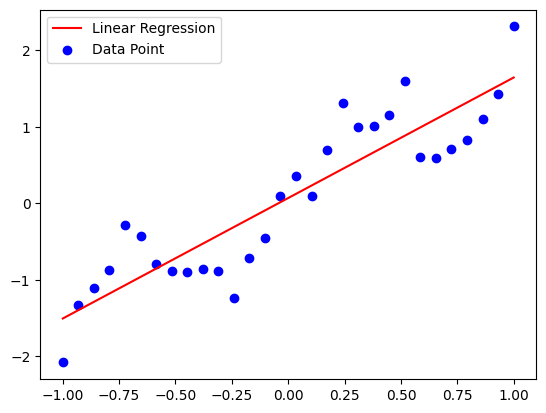

In [ ]:
ols_algorithm(X, y)

## Qo1) B & C - GD & SGD

### dataset

In [ ]:
artificial = np.genfromtxt('/content/artificial1d.csv', delimiter=',')
artificial

array([[-1.        , -2.08201726],
       [-0.93103448, -1.32698023],
       [-0.86206897, -1.10559772],
       [-0.79310345, -0.87394576],
       [-0.72413793, -0.28502695],
       [-0.65517241, -0.43115252],
       [-0.5862069 , -0.79475402],
       [-0.51724138, -0.88606806],
       [-0.44827586, -0.89989978],
       [-0.37931034, -0.86184365],
       [-0.31034483, -0.88805183],
       [-0.24137931, -1.23595129],
       [-0.17241379, -0.71956827],
       [-0.10344828, -0.45202286],
       [-0.03448276,  0.09889951],
       [ 0.03448276,  0.34896973],
       [ 0.10344828,  0.09747797],
       [ 0.17241379,  0.70019809],
       [ 0.24137931,  1.31051213],
       [ 0.31034483,  1.00177576],
       [ 0.37931034,  1.00318231],
       [ 0.44827586,  1.14910129],
       [ 0.51724138,  1.59220607],
       [ 0.5862069 ,  0.60909009],
       [ 0.65517241,  0.59441623],
       [ 0.72413793,  0.70300732],
       [ 0.79310345,  0.82332241],
       [ 0.86206897,  1.10646439],
       [ 0.93103448,

In [ ]:
artificial.shape

(30, 2)

In [ ]:
X = np.hstack((np.ones((30, 1)), artificial[:, [0]]))
y = artificial[:, [1]]

In [ ]:
print('X shape: ', X.shape)
print('y shape: ', y.shape)

X shape:  (30, 2)
y shape:  (30, 1)


### código

In [ ]:
class LinearRegression:

  def __init__(self, learning_rate=0.01, n_iters=1000):
    self.lr = learning_rate
    self.n_iters = n_iters
    self.weights = None
    self.bias = None
    self.count_samples_size = 0
    self.inter_error = []
    self.c_errors = []
    self.c_epoches = []

  def init_params(self):
      self.weights = np.zeros((self.n_features, 1))
      self.bias = 0

  def get_prediction(self, X):
    return (X @ self.weights) + self.bias

  def get_gradients(self, X, y, y_pred):
    error = y_pred - y
    dw = (1 / self.n_samples) * np.dot(X.T, error)
    db = (1 / self.n_samples) * np.sum(error)
    self.c_errors.append(db)
    return dw, db

  def get_gradients_sgd(self, X, y, y_pred, num_samples, full_y):
    self.count_samples_size +=  1
    error = y_pred - y
    dw = (1 / self.n_samples) * np.dot(X.T, error)
    db = (1 / self.n_samples) * np.sum(error)
    if self.count_samples_size < num_samples:
      self.inter_error.append(db)
    else:
      self.c_errors.append(calc_mse(full_y, np.sum(self.inter_error)))
      self.inter_error = []
      self.count_samples_size = 0
    return dw, db

  def update_params(self, dw, db):
    self.weights -= self.lr * dw
    self.bias -= self.lr * db

  def fitGD(self, X, y):
    count = 0
    self.n_samples, self.n_features = X.shape
    self.init_params()
    for iter in range(self.n_iters):
      count += 1
      self.c_epoches.append(count)
      y_pred = self.get_prediction(X)
      dw, db = self.get_gradients(X, y, y_pred) #derivate of the weights and bias
      self.update_params(dw, db)
    print(' =-= Paramêtros =-=\n', '\nVetor de pesos: \n', dw,'\n\n Bias:', db)
    print('\n Gráfico da reta')
    self.generate_plot(X, y)
    print('\n Gráfico do erro no treino')
    self.generate_train_plot(self.c_epoches, self.c_errors)

  def fitSGD(self, X, y):
    save_original = X
    count = 0
    self.n_samples, self.n_features = 1, X.shape[1]
    self.init_params()
    ds = np.hstack((X, y))
    for iter in range(self.n_iters):
      count += 1
      self.c_epoches.append(count)
      middle_v = np.random.permutation(ds)
      # print(middle_v.shape)
      # print(middle_v)
      for _ in range(middle_v.shape[0]):
        X_s = X[_].reshape(1, 2)
        # print(X_s)
        y_s = y[_].reshape(1, 1)
        # print(y_s)
        y_pred = self.get_prediction(X_s)
        dw, db = self.get_gradients_sgd(X_s, y_s, y_pred, ds.shape[0], y)
        self.update_params(dw, db)
    print(' =-= Paramêtros =-=\n', '\nVetor de pesos: \n', dw,'\n\n Bias:', db)
    self.generate_plot(X, y)
    # print(self.c_errors)
    print('\n Gráfico do erro no treino')
    self.generate_train_plot(self.c_epoches, self.c_errors)

  def predict(self, X):
      y_pred = self.get_prediction(X)
      return y_pred

  def generate_plot(self, X, y):
    predictions = self.predict(X)
    plt.plot(X[:, 1], predictions[:, :1], color='red', label='Linear Regression')
    plt.scatter(X[:, 1], y, color='blue', label='Data Point')
    plt.legend()
    plt.show()

  def generate_train_plot(self, count_epochs, count_errors):
    plt.plot(count_epochs, count_errors, color='red', label='Train Error')
    plt.legend()
    plt.show()

### GD

 =-= Paramêtros =-=
 
Vetor de pesos: 
 [[-1.16121231e-10]
 [-1.58630394e-02]] 

 Bias: -1.1612123855068527e-10

 Gráfico da reta


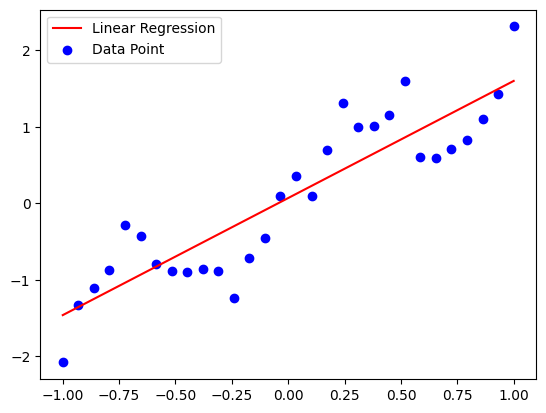


 Gráfico do erro no treino


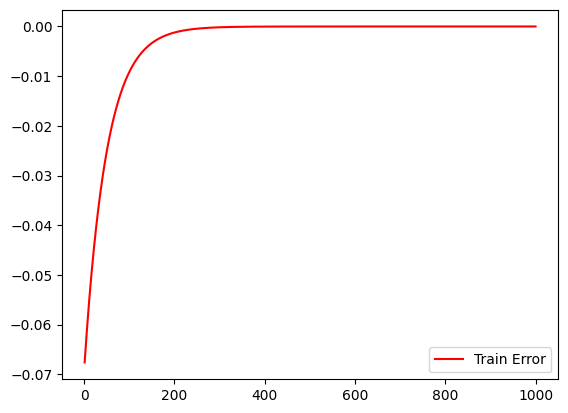

In [ ]:
linreg = LinearRegression(learning_rate=0.01, n_iters=1000)
linreg.fitGD(X, y)

In [ ]:
predictions = linreg.predict(X)
print(f"RMSE: {calc_mse(y, predictions)}")

RMSE: 0.21410208188254687


### SGD

 =-= Paramêtros =-=
 
Vetor de pesos: 
 [[-0.68782858]
 [-0.68782858]] 

 Bias: -0.6878285836074993


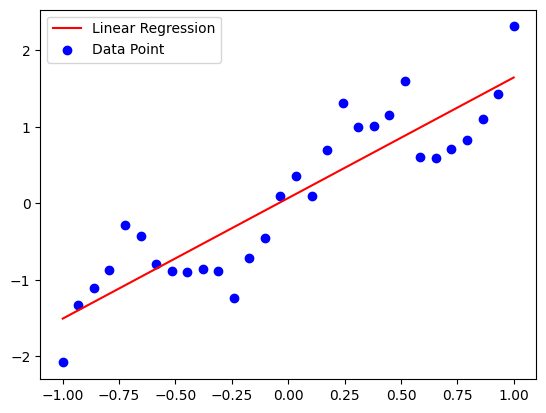


 Gráfico do erro no treino


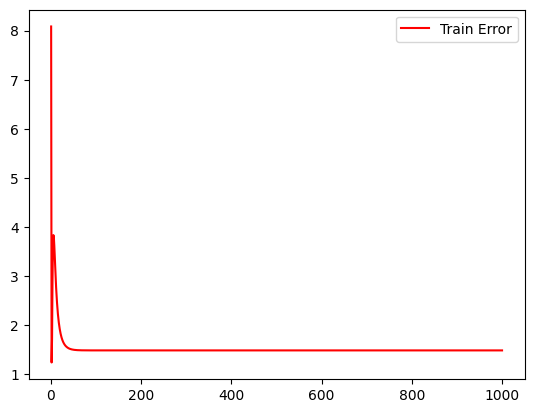

In [ ]:
linreg = LinearRegression(learning_rate=0.01, n_iters=1000)
linreg.fitSGD(X, y)

In [ ]:
predictions = linreg.predict(X)
print(f"MSE: {calc_mse(y, predictions)}")

MSE: 0.2134013879557619


## Qo2) A

In [ ]:
california = np.genfromtxt('/content/california.csv', delimiter=',')
california

array([[   4.1685    ,   20.        ,    6.70063694, ...,   38.8       ,
        -121.15      ,    2.175     ],
       [   2.8194    ,   24.        ,    4.7625    , ...,   36.75      ,
        -119.85      ,    0.811     ],
       [   2.425     ,   46.        ,    4.92771084, ...,   36.33      ,
        -119.31      ,    0.849     ],
       ...,
       [   4.7308    ,   35.        ,    5.66666667, ...,   33.83      ,
        -118.37      ,    3.534     ],
       [   4.2788    ,   10.        ,    5.375     , ...,   33.68      ,
        -117.35      ,    1.25      ],
       [   2.8036    ,   18.        ,    3.27400881, ...,   34.1       ,
        -118.35      ,    2.25      ]])

In [ ]:
california.shape

(1000, 9)

In [ ]:
def train_test_split(X, part):
  np.random.shuffle(X)
  n_train = int(X.shape[0]*part)
  train, test = X[:n_train,:], X[n_train:,:]
  X_train, X_test = train[:, :-1], test[:, :-1]
  y_train, y_test = train[:, -1].reshape(-1, 1), test[:, -1].reshape(-1, 1)
  return X_train, X_test, y_train, y_test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(california, 0.8)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(800, 8)
(800, 1)
(200, 8)
(200, 1)


## Qo2) B

In [ ]:
train = np.hstack((X_train, y_train))
test = np.hstack((X_test, y_test))

In [ ]:
class PolynomialRegressionOLS:

  def __init__(self, degree=2, regularization=0):
    self.degree = degree
    self.l2 = regularization

  def get_infos(self, train, test):
    n_samples_tr = train.shape[0]
    n_samples_te = test.shape[0]
    self.X_tr = np.ones((n_samples_tr, 1))
    self.X_te = np.ones((n_samples_te, 1))
    self.y_tr = train[:, -1]
    self.y_te = test[:, -1]
    self.n_features = train.shape[1]

  def transform(self, train, test):
    for _ in range(self.n_features-1):
      for pol in range(self.degree):
        self.X_tr = np.c_[self.X_tr, train[:, [_]]**(pol+1)]
        self.X_te = np.c_[self.X_te, test[:, [_]]**(pol+1)]

  def normalize(self):
    X_max = np.max(self.X_tr, axis = 0, keepdims=True)
    X_min = np.min(self.X_tr, axis = 0, keepdims=True)
    self.y_max = np.max(self.y_tr, axis = 0, keepdims=True)
    self.y_min = np.min(self.y_tr, axis = 0, keepdims=True)

    X_tr_norm = (self.X_tr - X_min)/(X_max - X_min)
    X_te_norm = (self.X_te - X_min)/(X_max - X_min)
    X_tr_norm[:, 0] = 1
    X_te_norm[:, 0] = 1

    y_tr_norm = (self.y_tr - self.y_min)/(self.y_max - self.y_min)

    return X_tr_norm, X_te_norm, y_tr_norm

  def denormalize(self, y_norm):
    return y_norm*(self.y_max - self.y_min) + self.y_min

  def get_weight(self, X_tr_norm, y_tr_norm):
    self.w = np.linalg.solve(X_tr_norm.T @ X_tr_norm + self.l2*np.eye(X_tr_norm.shape[1]), X_tr_norm.T @ y_tr_norm)

  def get_prediction(self, X):
    return  X @ self.w

  def fit(self, train, test):
    self.get_infos(train, test)
    self.transform(train, test)
    X_tr_norm, X_te_norm, y_tr_norm = self.normalize()
    self.get_weight(X_tr_norm, y_tr_norm)
    y_hat_tr_norm = self.get_prediction(X_tr_norm)
    y_hat_te_norm = self.get_prediction(X_te_norm)
    y_hat_tr = self.denormalize(y_hat_tr_norm)
    y_hat_te = self.denormalize(y_hat_te_norm)
    RMSE_tr = calc_rmse(self.y_tr, y_hat_tr)
    RMSE_te = calc_rmse(self.y_te, y_hat_te)
    return self.w, RMSE_tr, RMSE_te

In [ ]:
weight_v = []
RMSE_tr_v = []
RMSE_te_v = []

for degree in range(13):
  poly_ols = PolynomialRegressionOLS(degree)
  w, rmse_tr, rmse_te = poly_ols.fit(train, test)
  weight_v.append(w)
  RMSE_tr_v.append(rmse_tr)
  RMSE_te_v.append(rmse_te)

<ipython-input-37-ba2677a6f2cb>:28: RuntimeWarning: invalid value encountered in true_divide
  X_tr_norm = (self.X_tr - X_min)/(X_max - X_min)
<ipython-input-37-ba2677a6f2cb>:29: RuntimeWarning: invalid value encountered in true_divide
  X_te_norm = (self.X_te - X_min)/(X_max - X_min)


## Qo2) C

In [ ]:
pol = []
for x in range(13):
  pol.append(x+1)

print(pol)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]


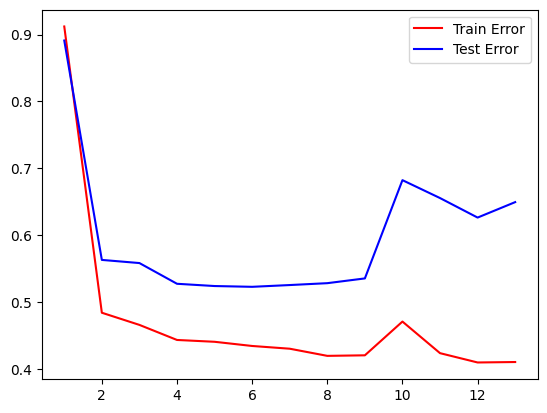

In [ ]:
plt.plot(pol, RMSE_tr_v, color='red', label='Train Error')
plt.plot(pol, RMSE_te_v, color='blue', label='Test Error')
plt.legend()
plt.show()

## Qo2) D

In [ ]:
weight_v = []
RMSE_tr_v = []
RMSE_te_v = []

for degree in range(13):
  poly_ols = PolynomialRegressionOLS(degree, 0.01)
  w, rmse_tr, rmse_te = poly_ols.fit(train, test)
  weight_v.append(w)
  RMSE_tr_v.append(rmse_tr)
  RMSE_te_v.append(rmse_te)

<ipython-input-37-ba2677a6f2cb>:28: RuntimeWarning: invalid value encountered in true_divide
  X_tr_norm = (self.X_tr - X_min)/(X_max - X_min)
<ipython-input-37-ba2677a6f2cb>:29: RuntimeWarning: invalid value encountered in true_divide
  X_te_norm = (self.X_te - X_min)/(X_max - X_min)


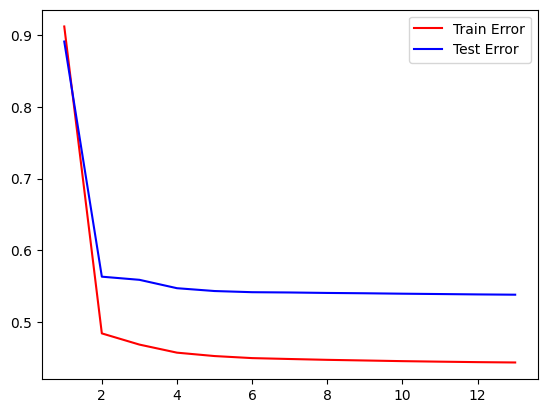

In [ ]:
plt.plot(pol, RMSE_tr_v, color='red', label='Train Error')
plt.plot(pol, RMSE_te_v, color='blue', label='Test Error')
plt.legend()
plt.show()